In [6]:
import pandas as pd
import numpy as np
from pandas_datareader import data

In [8]:
pd.to_datetime('Feb 13, 2009')


Timestamp('2009-02-13 00:00:00')

In [9]:
pd.to_datetime('03-01-2009')

Timestamp('2009-03-01 00:00:00')

In [10]:
pd.to_datetime('01-03-2009')

Timestamp('2009-01-03 00:00:00')

In [15]:
pd.to_datetime('Feb 13, 2009 14:20:00').hour

14

In [16]:
date1 = pd.Timestamp('2018-03-03')
date2 = pd.Timestamp('1984-03-03')
date1-date2

Timedelta('12418 days 00:00:00')

In [17]:
pd.Series([ pd.Timedelta(days=i) for i in range(3) ])

0   0 days
1   1 days
2   2 days
dtype: timedelta64[ns]

In [19]:
jan2015= pd.Period('2015-01')

In [21]:
jan2015.end_time

Timestamp('2015-01-31 23:59:59.999999999')

In [22]:
dates=pd.to_datetime([pd.Timestamp(2015,8,5), pd.Timestamp(2015,8,6), pd.Timestamp(2015,8,7)])
dates

DatetimeIndex(['2015-08-05', '2015-08-06', '2015-08-07'], dtype='datetime64[ns]', freq=None)

In [23]:
dates-dates[0]

TimedeltaIndex(['0 days', '1 days', '2 days'], dtype='timedelta64[ns]', freq=None)

In [24]:
dates.to_period('D')

PeriodIndex(['2015-08-05', '2015-08-06', '2015-08-07'], dtype='period[D]', freq='D')

In [27]:
ts1 = pd.Series(np.arange(3), dates)
ts1

2015-08-05    0
2015-08-06    1
2015-08-07    2
dtype: int32

In [28]:
ts1.index

DatetimeIndex(['2015-08-05', '2015-08-06', '2015-08-07'], dtype='datetime64[ns]', freq=None)

In [31]:
pd.date_range(end='2018-01-01', periods=5)

DatetimeIndex(['2017-12-28', '2017-12-29', '2017-12-30', '2017-12-31',
               '2018-01-01'],
              dtype='datetime64[ns]', freq='D')

In [32]:
test = pd.date_range(start = '2010-01-01', freq='M', periods=10)

In [49]:
weekDays = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")
for i in test:
    print(weekDays[i.weekday()])

Sunday
Sunday
Wednesday
Friday
Monday
Wednesday
Saturday
Tuesday
Thursday
Sunday


In [9]:
data = pd.read_csv('financial_data.csv', index_col='Date')

In [10]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1972-06-01,2.149165,2.173495,2.149165,2.153220,0.314722,1089200
1972-06-02,2.153220,2.173495,2.141055,2.149165,0.314129,1173500
1972-06-05,2.149165,2.169440,2.141055,2.149165,0.314129,5208100
1972-06-06,2.149165,2.157275,2.116725,2.124835,0.310573,1421400
1972-06-07,2.124835,2.137000,2.112669,2.112669,0.308795,671800


In [11]:
data =data['Close']

In [12]:
data.head()

Date
1972-06-01    2.153220
1972-06-02    2.149165
1972-06-05    2.149165
1972-06-06    2.124835
1972-06-07    2.112669
Name: Close, dtype: float64

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()


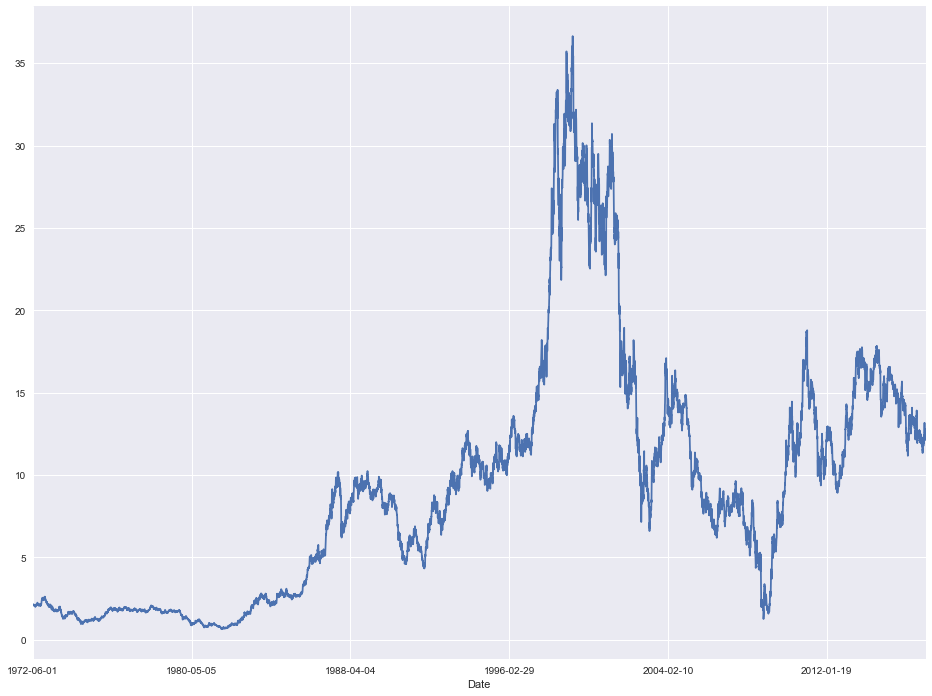

In [14]:
data.plot(figsize=(16,12))
plt.show()

In [15]:
data[0:4]

Date
1972-06-01    2.153220
1972-06-02    2.149165
1972-06-05    2.149165
1972-06-06    2.124835
Name: Close, dtype: float64

In [26]:
data[0:3].shift(1)

Date
1972-06-01         NaN
1972-06-02    2.153220
1972-06-05    2.149165
Name: Close, dtype: float64

In [27]:
data[0:3].shift(-1)

Date
1972-06-01    2.149165
1972-06-02    2.149165
1972-06-05         NaN
Name: Close, dtype: float64

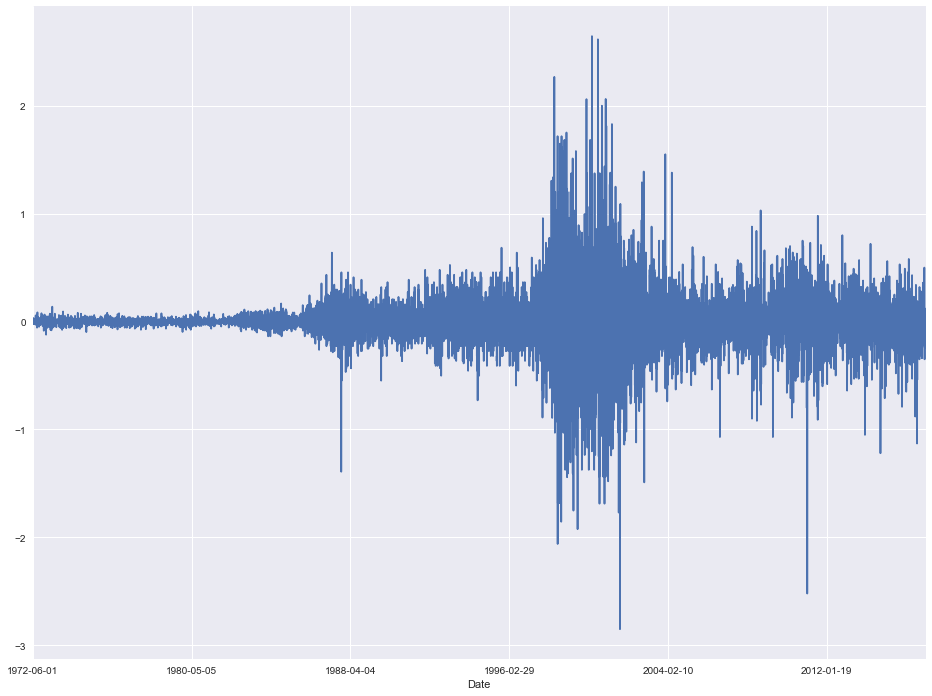

In [25]:
diff=data-data.shift(1)
diff.plot(figsize=(16,12))
plt.show()

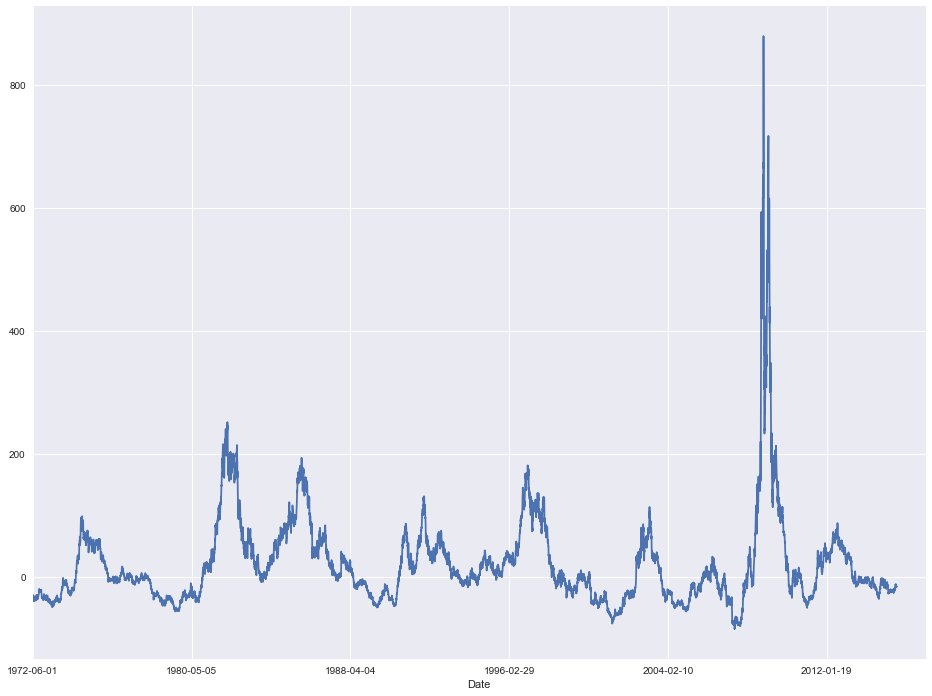

In [28]:
roi = 100 * (data.shift(-365)/data-1)
roi.plot(figsize=(16,12))

In [31]:
data.index = pd.to_datetime(data.index)

In [35]:
data[0:3].tshift(-1)

Date
1972-05-31    2.153220
1972-06-01    2.149165
1972-06-02    2.149165
Freq: D, Name: Close, dtype: float64

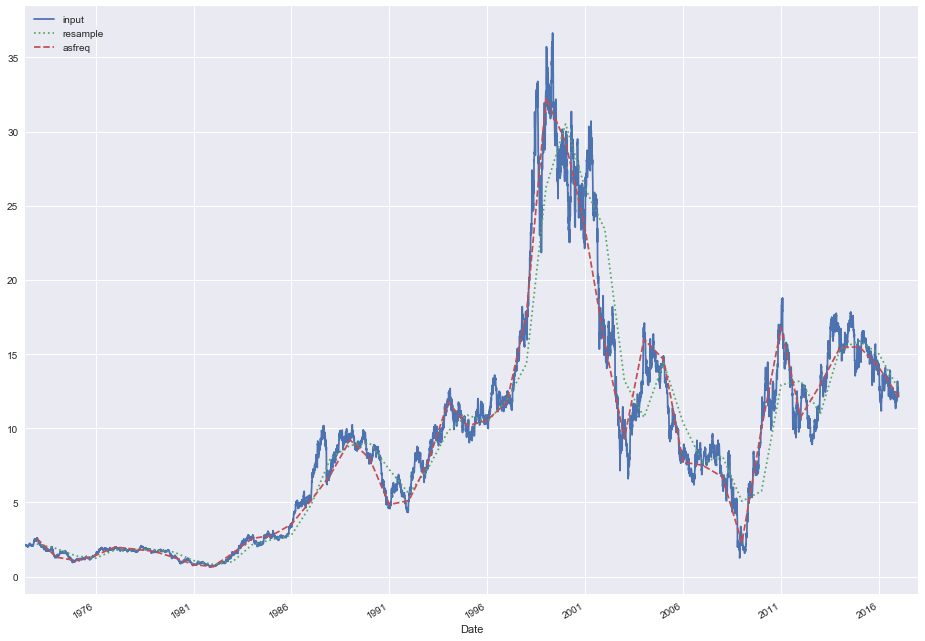

In [32]:
data.plot(figsize=(16,12), style='-')
data.resample('BA').mean().plot(style=':')
data.asfreq('BA').plot(style='--')
plt.legend(['input', 'resample', 'asfreq'], loc='upper left');

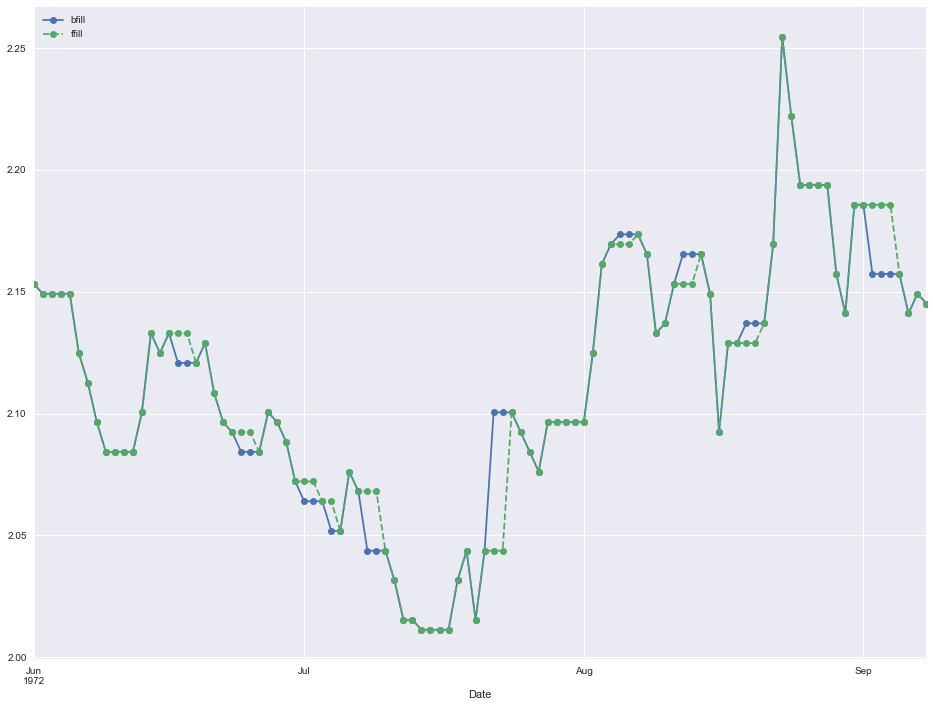

In [36]:
data.asfreq('D', method='bfill')[0:100].plot(figsize=(16,12), style='-o')
data.asfreq('D', method='ffill')[0:100].plot(style='--o')
plt.legend(['bfill', 'ffill'],
           loc='upper left');
plt.show()

In [39]:
data.resample('BA').mean()

Date
1972-12-29     2.205630
1973-12-31     1.894712
1974-12-31     1.401229
1975-12-31     1.239813
1976-12-31     1.812245
1977-12-30     1.822264
1978-12-29     1.817904
1979-12-31     1.660338
1980-12-31     1.089248
1981-12-31     0.833945
1982-12-31     1.008828
1983-12-30     2.156493
1984-12-31     2.495525
1985-12-31     2.797517
1986-12-31     4.833427
1987-12-31     8.003531
1988-12-30     8.846673
1989-12-29     9.011214
1990-12-31     7.215295
1991-12-31     5.597982
1992-12-31     7.347184
1993-12-31     9.815402
1994-12-30    10.886573
1995-12-29    10.439027
1996-12-31    11.900290
1997-12-31    14.350171
1998-12-31    26.253446
1999-12-31    30.516656
2000-12-29    26.201966
2001-12-31    23.411038
2002-12-31    13.221429
2003-12-31    10.740278
2004-12-31    14.413690
2005-12-30    10.374524
2006-12-29     7.695179
2007-12-31     8.138645
2008-12-31     5.084625
2009-12-31     5.766587
2010-12-31    12.932262
2011-12-30    13.194643
2012-12-31    10.956800
2013-12-31 

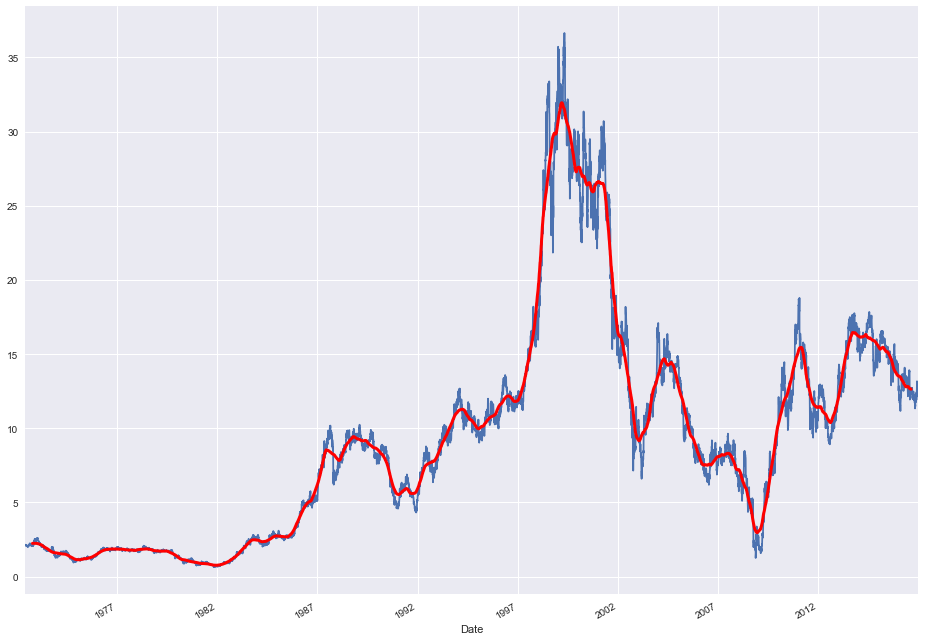

In [67]:
rolling = data.rolling(180, center=True)
data.plot(figsize=(16,12))
rolling.mean().plot(color='red', linewidth=3)
plt.show()

In [74]:
data = pd.read_csv('weatherHistory.csv', index_col='Date', parse_dates=True)

In [80]:
data = data['Temperature (C)']

In [81]:
data = data['2006-03-31':'2009-12-31']

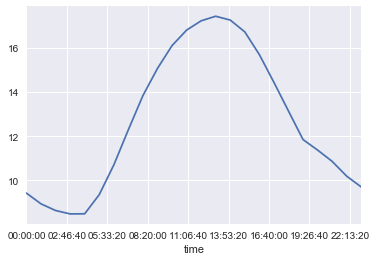

In [86]:
data.groupby(data.index.time).mean().plot()

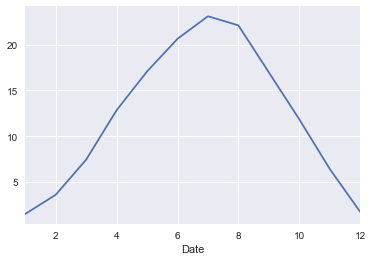

In [87]:
data.groupby(data.index.month).mean().plot()